<a href="https://colab.research.google.com/github/giovannadm/giovannadm/blob/Trab-Pratico-Sinais/TrabPraticoSinais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIBLIOTECAS

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sym
from scipy import signal, integrate, fftpack
from scipy.fft import fft, fftfreq
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0)

# QUESTÃO 1-A E 1-B

O sinal x[n-2] está em avanço e o sinal x[n+1] está em atraso


<ipython-input-27-6bc423b35b50>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n_x1, x1,'blue',use_line_collection=True)
<ipython-input-27-6bc423b35b50>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n_x2, x2,'green',use_line_collection=True)


[ 0.    0.    4.   12.   21.   26.   25.   24.   25.   22.   16.    9.
  5.25  4.5   2.25  0.    0.  ]


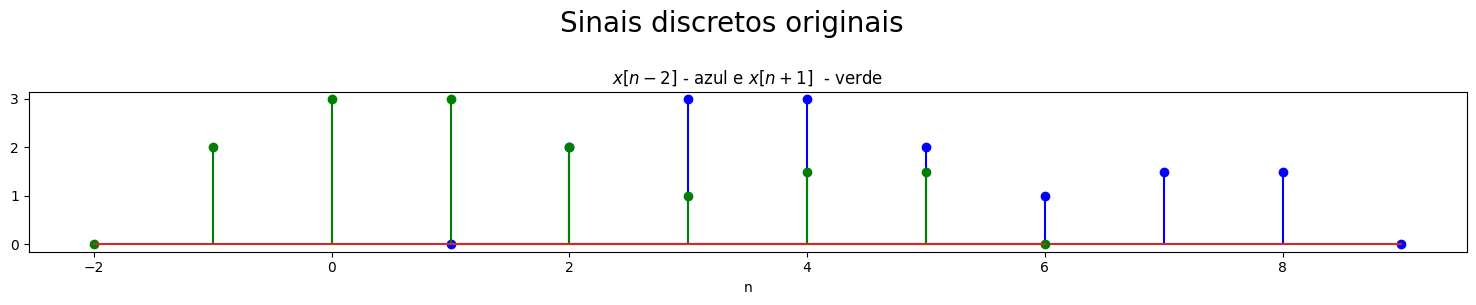

In [ ]:
#Especificando os 2 sinais
x1 = np.array([0, 2, 3, 3, 2, 1, 1.5, 1.5, 0]) #valor do sinal x1
n_x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  #índice do sinal x1
x2 = np.array([0, 2, 3, 3, 2, 1, 1.5, 1.5, 0]) #valores do sinal x2
n_x2 = np.array([-2, -1, 0, 1, 2, 3, 4, 5, 6])  #índice do sinal x2

#Especificando detalhes do gráfico e plotando sinais
plt.figure(figsize=(15,3));
plt.suptitle("Sinais discretos originais",fontsize=20, y=1.00);
plt.stem(n_x1, x1,'blue',use_line_collection=True)

plt.stem(n_x2, x2,'green',use_line_collection=True)
plt.title("$x[n-2]$ - azul e $x[n+1]$  - verde")
plt.xlabel("n")

plt.tight_layout();

#Convolução dos 2 sinais
y = np.convolve(x1,x2)
print(y)

In [ ]:
#Definindo os índices da primeira e última amostra de x1 e x2
index_1a_amostra_x1 = 1
index_ultima_amostra_x1 = 9

index_1a_amostra_x2 = -2
index_ultima_amostra_x2 = 6

#Criando 2 arrays com valores começando na primeira amostra de cada sinal e indo até a última amostra, incrementando por 1
x1_s = np.arange(index_1a_amostra_x1,index_ultima_amostra_x1 + 1, 1)
x2_s = np.arange(index_1a_amostra_x2,index_ultima_amostra_x2 + 1, 1)

x1_s
x2_s

array([-2, -1,  0,  1,  2,  3,  4,  5,  6])

<ipython-input-4-b842513d0a92>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(index_sinal_y, y, use_line_collection = True)


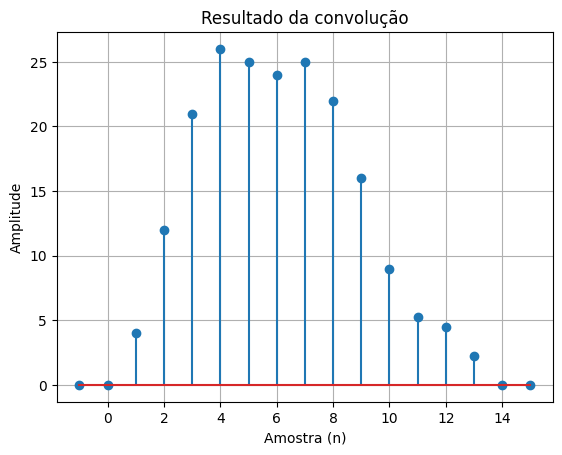

In [ ]:
#Calculando índice da convolução dos dois sinais
index_sinal_y = np.arange(min(x1_s) + min(x2_s), max(x1_s) + max(x2_s)+1, 1)
index_sinal_y

min(x1_s) + min(x2_s)
max(x1_s) + max(x2_s)

#Plotagem da convolução dos 2 sinais, x1 e x2
plt.grid("on")
plt.title("Resultado da convolução")
plt.xlabel("Amostra (n)")
plt.ylabel("Amplitude")
plt.stem(index_sinal_y, y, use_line_collection = True)
plt.show()

#QUESTÃO 1-C

In [ ]:
#Calculando a Transformada Discreta de Fourier (TDF) do array y
y = np.array([0, 2, 3, 3, 2, 1, 1.5, 1.5, 0])
print(fft(y))

#Quantidade de amostras na Transformada Discreta de Fourier (TDF)
print('Numero de amostras:')
N = len(y)
print(N)

Fs = 32 #Frequência de amostragen
Ts = 1.0 / Fs #período da amostragem

#Calculando as frequências correspondentes para a TDF
print('Vetor X[k]:')
yf = fft(y)
print(yf)
print('Range das frequencias de análise:')
freqs_analises = fftfreq(N, Ts)[:N]
print(freqs_analises)

[14.        -0.j         -2.75557218-4.4038451j  -3.83318711-0.54082001j
 -0.25      -1.29903811j -0.16124071-0.03408922j -0.16124071+0.03408922j
 -0.25      +1.29903811j -3.83318711+0.54082001j -2.75557218+4.4038451j ]
Numero de amostras:
9
Vetor X[k]:
[14.        -0.j         -2.75557218-4.4038451j  -3.83318711-0.54082001j
 -0.25      -1.29903811j -0.16124071-0.03408922j -0.16124071+0.03408922j
 -0.25      +1.29903811j -3.83318711+0.54082001j -2.75557218+4.4038451j ]
Range das frequencias de análise:
[  0.           3.55555556   7.11111111  10.66666667  14.22222222
 -14.22222222 -10.66666667  -7.11111111  -3.55555556]


In [ ]:
#Calculando a Frequência de Nyquist
F_Niquyst = 16
Fs = F_Niquyst*2
print(Fs )

32


In [ ]:
# Magnitude do Vetor X[K]
print('Magnitude:')
print(np.abs(yf[0])) #com este valor obtemos DC
print(np.abs(yf[1]))
print(np.abs(yf[2]))
print(np.abs(yf[3]))
print(np.abs(yf[4]))
print(np.abs(yf[5]))
print(np.abs(yf[6]))
print(np.abs(yf[7]))
print(np.abs(yf[8]))

#em RADIANOS:
print('Fase:')
print(np.angle(yf[0]))
print(np.angle(yf[1]))
print(np.angle(yf[2]))
print(np.angle(yf[3]))
print(np.angle(yf[4]))
print(np.angle(yf[5]))
print(np.angle(yf[6]))
print(np.angle(yf[7]))
print(np.angle(yf[8]))

Magnitude:
14.0
5.194904201888327
3.871150951581781
1.3228756555322954
0.16480486421968238
0.16480486421968238
1.3228756555322954
3.871150951581781
5.194904201888327
Fase:
-0.0
-2.129912937266475
-3.0014289419457776
-1.7609219301413634
-2.933242529812738
2.933242529812738
1.7609219301413634
3.0014289419457776
2.129912937266475


Text(0, 0.5, 'Magnitude')

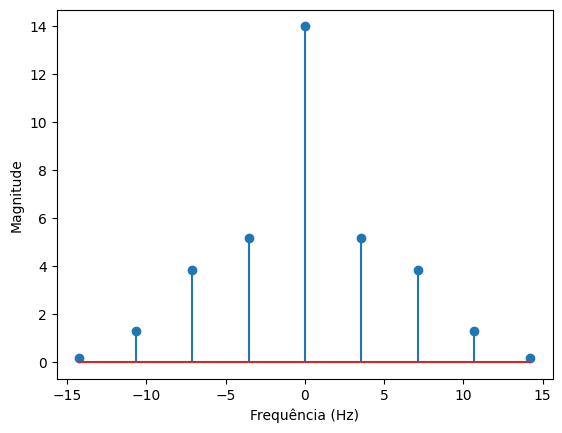

In [ ]:
#Número de amostras:
N=len(yf)
#Frequência de Nyquist é 16 HZ
Fs=32
#Período de amostragem
Ts=1/Fs
x= Ts * np.arange(N)

#Módulo (magnitude) do sinal
magnitude = np.abs(yf)

#Fase do sinal
fase = np.angle(yf)

#Plotando o gráfico da Magnitude (módulo) x frequência:
plt.stem(freqs_analises, magnitude)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Fase (rad)')

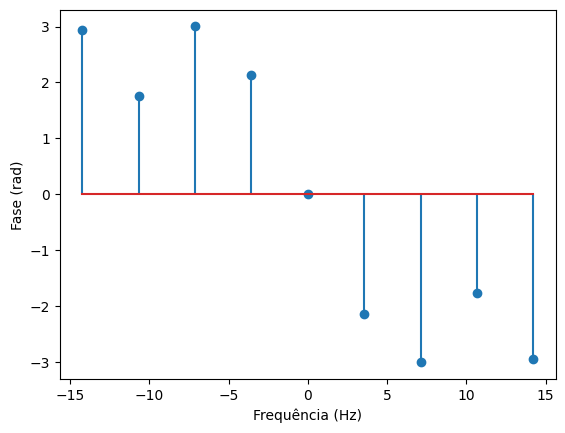

In [ ]:
#Plotando o gráfico da fase x frequência:
plt.stem(freqs_analises,fase)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (rad)')

#QUESTÃO 1-D

O valor DC representa o valor médio do sinal.

In [ ]:
print(np.abs(yf[0])/len(yf)) #com este valor obtemos DC

1.5555555555555556


#QUESTÃO 1-E

Os dois valores são iguais

In [ ]:
# Verificando o TEOREMA DE PARSEVAL:
#Energia no domínio do tempo:
Ex_n = sum(abs(y)**2)
print(Ex_n)
#Energia no domínio da frequência
Ex_k = (1/yf.size)*sum(abs(yf)**2)
print(Ex_k)

31.5
31.5
